In [1]:
#import model building libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

Download the dataset from
https://www.kaggle.com/datasets/saumyamohandas/animal-dataset

## Image preprocessing

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#2.configure image data generator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
#3.Apply image data generator functionality to train and test images
x_train=train_datagen.flow_from_directory(r'dataset\Training',target_size=(64,64),batch_size=32,class_mode="categorical")
x_test = test_datagen.flow_from_directory(r'dataset\Testing',target_size = (64,64),batch_size = 32 , class_mode = 'categorical')

Found 1238 images belonging to 4 classes.


Found 326 images belonging to 4 classes.


In [5]:
print(x_train.class_indices)

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}


# Model Building

In [6]:
#2.initializing the model
model=Sequential()

In [7]:
#3.add convolution layer(no.of filters,size of filter,input shape)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [8]:
#add max pool layer(pool_size)
model.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
#add flatten layer  ---input of ann
model.add(Flatten())

In [10]:
#ann hidden layer
model.add(Dense(units=128,activation="relu"))

In [11]:
#add output layer
model.add(Dense(units=4,activation="softmax"))

In [12]:
#Compile the model (loss fucntion,accuracy,optimizer)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")

In [13]:
#fit model (x_train,steps_per epoch,epochs,validation_data,validation_steps)
model.fit(x_train,steps_per_epoch=39,epochs=5,validation_data=x_test,validation_steps=10)

Epoch 1/5
39/39 [==============================] - 28s 695ms/step - loss: 1.4158 - accuracy: 0.4184 - val_loss: 1.1041 - val_accuracy: 0.5344
Epoch 2/5
39/39 [==============================] - 5s 137ms/step - loss: 0.9727 - accuracy: 0.6131 - val_loss: 0.8302 - val_accuracy: 0.6719
Epoch 3/5
39/39 [==============================] - 5s 130ms/step - loss: 0.7941 - accuracy: 0.6939 - val_loss: 0.7502 - val_accuracy: 0.6969
Epoch 4/5
39/39 [==============================] - 5s 137ms/step - loss: 0.7239 - accuracy: 0.7262 - val_loss: 0.5437 - val_accuracy: 0.8062
Epoch 5/5
39/39 [==============================] - 5s 136ms/step - loss: 0.6897 - accuracy: 0.7326 - val_loss: 0.6422 - val_accuracy: 0.7750


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 3937796 (15.02 MB)
Trainable params: 3937796 (15.02 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [15]:
#save our model
model.save("animal.h5")

C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Test the model

In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [17]:
import tensorflow as tf

In [18]:
model=tf.keras.models.load_model(r"animal.h5",compile=False)

In [19]:
#D:\SmartBridge\VIT_morning_slot\dataset\Testing\elephants\nature_3306013__340.jpg
img=image.load_img(r"D:\SmartbridgeAIML\dataset\Testing\elephants\lionesses_644822__340.jpg",target_size=(64,64))

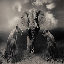

In [20]:
img

In [21]:
x=image.img_to_array(img)

In [22]:
x

array([[[110., 105.,  99.],
        [112., 107., 101.],
        [121., 114., 108.],
        ...,
        [ 49.,  45.,  42.],
        [ 50.,  49.,  47.],
        [ 48.,  47.,  45.]],

       [[115., 110., 104.],
        [121., 116., 110.],
        [124., 117., 111.],
        ...,
        [ 49.,  45.,  42.],
        [ 47.,  46.,  44.],
        [ 45.,  44.,  42.]],

       [[127., 120., 112.],
        [131., 124., 116.],
        [134., 125., 118.],
        ...,
        [ 52.,  48.,  45.],
        [ 51.,  50.,  48.],
        [ 58.,  57.,  55.]],

       ...,

       [[ 54.,  47.,  41.],
        [ 88.,  83.,  79.],
        [115., 112., 107.],
        ...,
        [ 78.,  77.,  75.],
        [ 12.,  11.,   9.],
        [ 55.,  54.,  52.]],

       [[ 48.,  47.,  43.],
        [ 31.,  30.,  26.],
        [ 56.,  51.,  45.],
        ...,
        [ 74.,  73.,  71.],
        [  5.,   1.,   0.],
        [101.,  97.,  94.]],

       [[ 33.,  29.,  26.],
        [ 53.,  49.,  46.],
        [149., 1

In [23]:
x=np.expand_dims(x,axis=0)

In [24]:
x.ndim

4

In [25]:
x.shape

(1, 64, 64, 3)

In [26]:
pred=model.predict(x)

1/1 [==============================] - 0s 107ms/step


In [27]:
print(pred)

[[0.0000000e+00 9.9979693e-01 2.0306034e-04 0.0000000e+00]]
